### General Info: This is Notebook for analysing multilayer  tiff exports created with  FLIM-GUIs of SymPhoTime 64 software.

Feature List: 
              -Low and High Intensity Threshod 
             - Lifetime values along profile lines.
              -Autosaving of all plots created as pdf and all ROI masks as ASCII. 
              -Saving of all layers in tiff as individual ASCCI files.

### Before you start:
    - Open a  Terminal Window under Jupyter Noebooks and install the following packages :

#conda install -c conda-forge pims

#conda install -c conda-forge numpy

#conda install -c conda-forge matplotlib

#conda install -c conda-forge scikit-image


In [1]:
################################IMPORT NECESSARY PACKAGES################
import numpy as np
import matplotlib.pyplot as plt
import pims
import skimage
import os
import datetime
#########################################################################

#### Load the an EXAMPLE.tiff
The tiff file should be in the same directory as the  ROI_Selection_notebook.
The number of frames depends on what exactly the image is formed of. 
If the exported image is a fastFLIM images the tiff file will contain 2 frames: --intensity --average lifetime (unfitted, this is the average photon arrival time) After a "FLIM FIT " is performed in SymPhoTime the two frames can be --intensity --average lifetime (intensity weighted average lifetime )

In [2]:
#load image ->transforms  frame objects into arrays
######Image name without the .tiff extension
imageName='daisy'
###############################################
v = pims.TiffStack(imageName +'.tiff')
print('frames: ',len(v))

frames:  2


In [3]:
#Frame objects returned by PIMS are a subclass of numpy.ndarray, adding two new attributes:
#frame_no, an integer
#metadata, a dictionary
intensity=v[0]
lifetime=v[1]
####################
im_size=lifetime.shape # tuple    
im_intensity=np.zeros(im_size)  # initilise the intensity image array
im_lifetime=np.zeros(im_size)    #  initilise the lifetime image array
lifetime2=1E+9*lifetime # lifetime image values given in ns
for i in range(1,im_size[1]):
    im_intensity[i,:] = intensity[i,:]
for j in range(1,im_size[0]):  
    im_lifetime[j,:] = lifetime2[j,:]


###### A BASE NAME  TO BE USED FOR ALL EXPORTS

In [4]:
###### A BASE NAME  TO BE USED FOR ALL EXPORTS ##############################
basename='DAISY_POLLEN_'
###### in Directory  
#### 
DirNAME= datetime.datetime.now().strftime("%Y%m%d-%H_%M")
InitDir = os.getcwd()
try:
    os.mkdir(imageName + str(DirNAME))
except:
    pass

os.chdir(imageName + str(DirNAME))
#############
#####os.chdir(path)   
############################################

######Save Intensity and Lifetime image as seperate .dat files 
IntenNAME =  basename + '_PhCounts.dat'
LifetimeNAME = basename + 'AvIntenLifetime.dat'
np.savetxt(IntenNAME, im_intensity, fmt="%12.6G")
np.savetxt(LifetimeNAME, im_lifetime, fmt="%12.6G")
#########################################################
TotalPixels=im_lifetime.size                     # TOTAL PIXELS IN THE IMAGE
#######################################################

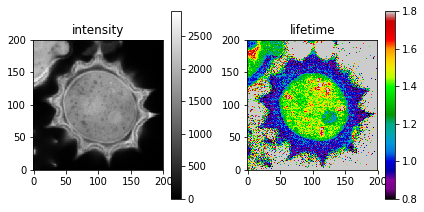

In [5]:
fig1 = plt.figure(figsize=(6, 3.2))
ax11 = fig1.add_subplot(121)
ax12 = fig1.add_subplot(122)
#cax1 = fig1.add_axes([0.12, 0.1, 0.78, 0.8])
ax11.set_title('intensity')
ax11.set_aspect('equal')
plt.sca(ax11)
plt.imshow(im_intensity, cmap="gray", origin='upper')
plt.gca().invert_yaxis()
plt.colorbar(orientation='vertical')
plt.tight_layout()
#plt.show()
ax12.set_title('lifetime')
plt.sca(ax12)
plt.imshow(lifetime2,vmin=.8,vmax=1.8,cmap="nipy_spectral") # This sets the scale for the colormap to 0.8 ns - 1.8 ns
plt.gca().invert_yaxis()
ax12.set_aspect('equal')
plt.colorbar(orientation='vertical')
############################################################################
# SAVE PLOTS #########the following formats can be also used .pdf, .eps. .svg
#intensityNamePNG=basename + 'intensity.png'
intensityNamePDF=basename + 'intensity.pdf'
#plt.savefig(intensityNamePNG, format='png')
plt.savefig(intensityNamePDF, format='pdf')
#plt.show()
#plt.savefig('intensity.eps', format='eps')
######################################################################
#######


#### Set a Low counts Threshold Limit and /or a High counts Threshold limit for your image.
#### apply a simple INTENSITY  threashold. Show all pixels with intensity value equal or more than LOW threashold 
#### or equal or fewer than the  HIGH threashold

### OUTPUT: ROI mask , Intensity/FLIM image with ROI mask applied , Histogram of lifetime for all pixels within ROI, mean lifetime per ROI, Area of ROI as percentage of the field of View

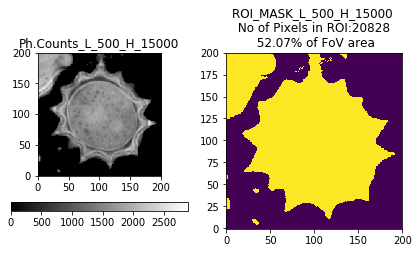

In [6]:
##########################################################################################
LOWthreshold=500 #threshold given in photon counts
HIGHthreshold=15000 
thresNAME='_L_' + str(LOWthreshold) + '_H_'+ str(HIGHthreshold) # Name used for automated saving
##########################################################################################
thres_image_ROI_mask=np.ones(im_size)
for i in range(im_size[0]):
    for j in range(im_size[1]):
        if im_intensity[i,j] < LOWthreshold or im_intensity[i,j] >HIGHthreshold :
            thres_image_ROI_mask[i,j]=0
        
ROI_pixels = np.nonzero(thres_image_ROI_mask)
N_ROIpixels = len(ROI_pixels[1])
ROI_area = 100 * N_ROIpixels / TotalPixels   #ROI AREA as a percentage of the FULL IMAGE
    #    ax87.title.set_text('ROI_mask,No of Pixels: ' + str( N_ROIpixels2))
######SAVE ROI MASK AS ASCII
roimask = basename + thresNAME + '_ROI_Mask.dat'
np.savetxt(roimask, thres_image_ROI_mask, fmt="%12.6G")
#########################################################
fig2 = plt.figure(figsize=(6, 3.2))
ax21 = fig2.add_subplot(121)
ax22 = fig2.add_subplot(122)
ax21.set_title('Ph.Counts' + thresNAME )
ax21.set_aspect('equal')
plt.sca(ax21)

plt.imshow((im_intensity*thres_image_ROI_mask),cmap="gray")
plt.gca().invert_yaxis()
plt.colorbar(orientation='horizontal')
plt.tight_layout()
#plt.show()
# SAVE PLOTS #########the following formats can be also used .pdf, .eps. .svg
THRESIntenNamePNG = basename + thresNAME +'_intensity.png'
THRESIntenNamePDFF= basename + thresNAME +'_intensity.pdf'
#plt.savefig(intensityNamePNG, format='png')
plt.savefig(intensityNamePDF, format='pdf')
#plt.savefig('intensity.eps', format='eps')
######################################################################
ax22.set_title('ROI_MASK'+thresNAME+ ' \n No of Pixels in ROI:' + str( N_ROIpixels) + ' \n ' +  str(ROI_area) +'% of FoV area')
ax21.set_aspect('equal')
ax22.set_aspect('equal')
plt.sca(ax22)

plt.imshow(thres_image_ROI_mask)
plt.gca().invert_yaxis()
# SAVE PLOTS #########the following formats can be also used .pdf, .eps. .svg
THRESROIMASKPNG = basename + thresNAME +'_ROI_Mask.png'
THRESIntenNamePDF= basename + thresNAME +'_ROI_Mask.pdf'
#plt.savefig(THRESROIMASKPNG, format='png')
plt.savefig(THRESIntenNamePDF, format='pdf')
plt.show()
######################################################################

### Define Lines across the image and get the profile of the mean Lifetime.
###After executing the following block you can draw lines by using the mouse in the image. Hint: If the figure is not expanded just click on the left side of it.
One can make multiple selections. For each selection the corresponding profile is drawn and saved automatically. The name includes the pixel co-ordinates of the start and end of the line.

<IPython.core.display.Javascript object>


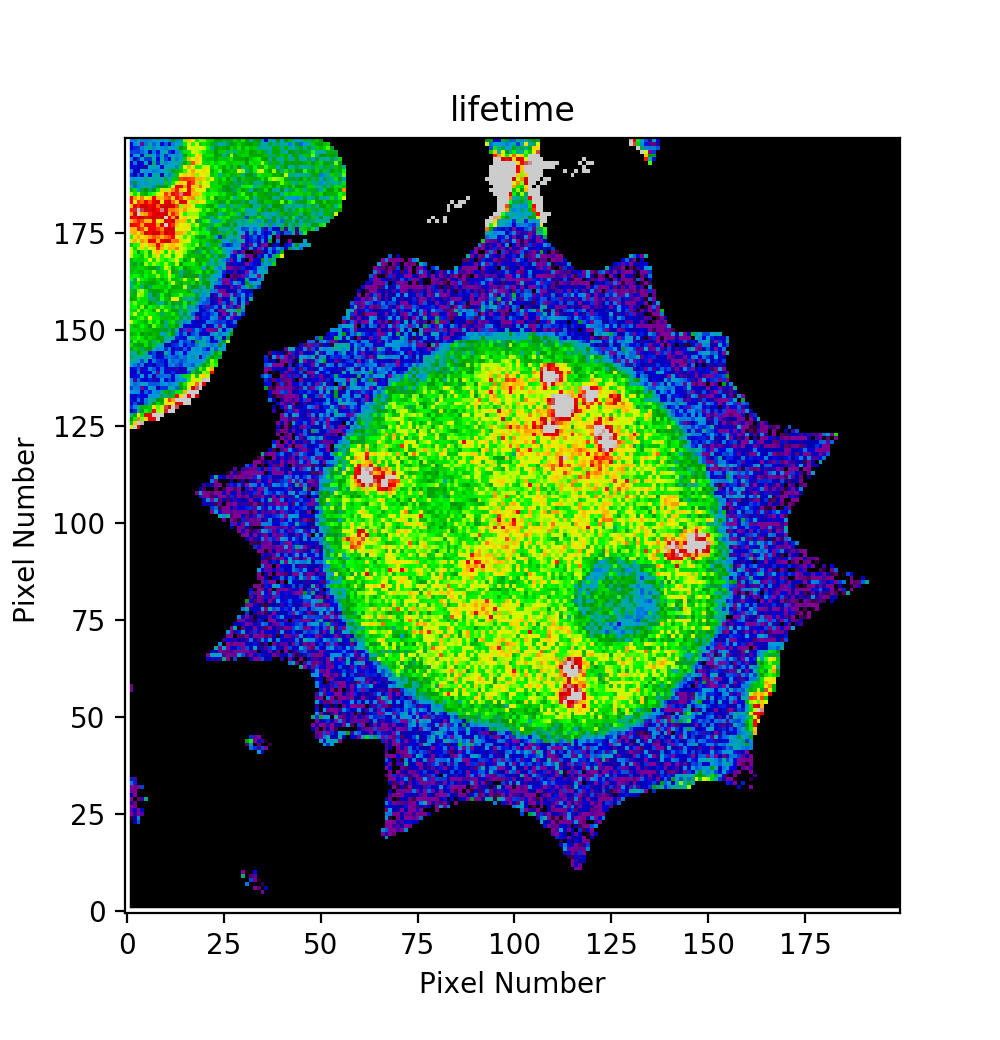

<IPython.core.display.Javascript object>


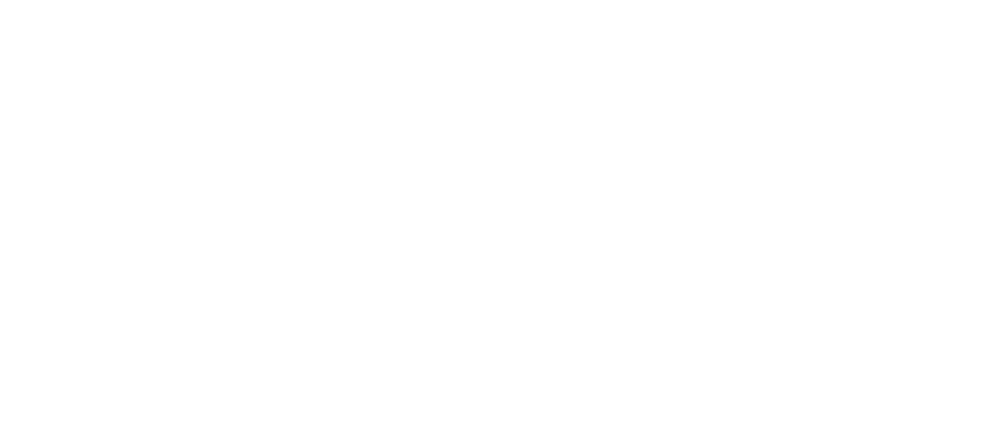

In [7]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import profile_line
import matplotlib.patches as patches
import scipy
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler
x0=[0] 
y0=[0]
x1=[1] 
y1=[1]
xx0=-2 
yy0=-2
xx1=-2
yy1=-2
# 1. Setting prop cycle on default rc parameter
plt.rc('lines', linewidth=2)
plt.rc('axes', prop_cycle=(cycler('color', ['r', 'g', 'b', 'y','k','c'])))

l1=im_size[0]+1
x, y = np.mgrid[1:l1:1, 1:l1:1]
z = im_lifetime*thres_image_ROI_mask
#-- Extract the line...
#-- Plot...
fig77 = plt.figure('Lifetime image ',figsize=(5,5.2))
ax77 = fig77.add_subplot(111)
plt.ylabel('Pixel Number ');
plt.xlabel('Pixel Number');
ax77.set_title('lifetime')
ax77.set_aspect('equal')
plt.imshow(z,vmin=.8,vmax=1.8,cmap="nipy_spectral")
plt.gca().invert_yaxis()
fig5 = plt.figure('Lifetime across selected line ',figsize=(5,2.2)) 
class drawline(object):
    def __init__(self, ax):
        self.ax = ax
        self.lx = ax.axhline(color='w')  # the horiz line
        self.ly = ax.axvline(color='w')  # the vert line
       
        # text location in axes coords
        self.txt = ax.text(0., 0., '', transform=ax.transAxes,color='white')
       
    def mouse_press(self, event):
        global x0
        global y0
        global xx0
        global yy0
        if not event.inaxes:
            return
                   
        x, y = event.xdata, event.ydata
        # update the line positions
        self.lx.set_ydata(y)
        self.ly.set_xdata(x)  
        x=round(x)
        y=round(y)
        x0=x
        y0=y
        xx0= np.asscalar(np.array(x0))
        yy0= np.asscalar(np.array(y0))
        #plt.plot([x0], [y0], 'ro')
        #plt.draw()
        #return (x0,y0)
        
    def on_release(self, event):
        global x1
        global y1
        global zi
        global xx1
        global yy1
        global fig5
        if not event.inaxes:
            return
            
        xend, yend = event.xdata, event.ydata
        # update the line positions
        self.lx.set_ydata(yend)
        self.ly.set_xdata(xend)  
        xend=round(xend)
        yend=round(yend)
        x1=xend
        y1=yend
        self.txt.set_text('x=%1.2f, y=%1.2f' % (x1, y1))
        plt.sca(self.ax)
        plt.plot([x0,x1],[y0,y1], 'o-')
        ann1=ax77.annotate('(%1.0f, %1.0f)' %(x0 , y0) , xy=(2, 1), xytext=(x0, y0) ,  color='white', fontsize=10, weight='bold')
        ann2=ax77.annotate(' (%1.0f, y=%1.0f)' %(x1 , y1) , xy=(2, 1), xytext=(x1, y1), color='white', fontsize=10, weight='bold')
        NAME='Profile_%1.0f_%1.0f_%1.0f_%1.0f_' %(x0,y0,x1,y1)
        
        xx1= np.asscalar(np.array(x1))
        yy1= np.asscalar(np.array(y1))
        ax22 = fig5.add_subplot(111)
        plt.sca(ax22)
        aa = skimage.measure.profile_line(z, [xx0,yy0] ,[xx1,yy1], linewidth=1, order=1, mode='constant', cval=0.0) 
        np.savetxt(NAME,  aa, fmt="%12.2G")
        plt.plot(aa,marker='o', markersize=3)
        plt.ylabel('Average lifetime [ns] ')
        plt.xlabel('Pixel number along profile')
        #plt.show()

#plt.scatter(xx0,yy1,'r.-')

drawline= drawline(ax77)
cidpress = fig77.canvas.mpl_connect('button_press_event', drawline.mouse_press)
cidrelease =fig77.canvas.mpl_connect('button_release_event', drawline.on_release)
#cidmotion =fig.canvas.mpl_connect('motion_notify_event', drawline.mouse_move)
#plt.show()


In [8]:
############Save Overview Figures
plt.savefig('Profiles_Overview', format='pdf')  
plt.sca(ax77)
plt.savefig('Lines_Overview', format='pdf') 

## Go back to initial directory and be ready to start again

In [9]:
######RETURN  TO INITIAL DIRECTORY , in which the original tiff file was saved. 

os.chdir(InitDir)